In [1]:
import matplotlib
#matplotlib.use('Agg') # necessary for linux kernal
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from keras import models
from skimage import measure

from data_helper import readImg, rescaleImg, IoUcheck, accuracy_score

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
def detect_contours(gray):

    contours = measure.find_contours(gray, 0.5)
    contours = [measure.approximate_polygon(contour, tolerance=3) for contour in contours]
    return contours

def plot_contours(grayx, contours, target):
    
    plt.imshow(grayx)

    for n, contour in enumerate(contours):
        if len(contour) > 3:
            plt.plot(contour[:, 1], contour[:, 0], linewidth=1)

    plt.savefig('Compare_' + target, dpi=600)
    
def predict(model_ex1, image_arr):
    conc2 = np.reshape(model_ex1.predict(np.reshape(image_arr, (1, image_arr.shape[0], image_arr.shape[1], 1))), 
                       (image_arr.shape[0], image_arr.shape[1]))
    return conc2 > 0.5

In [3]:
tmpPath = r"../tmp_results/predictions/2018-11-30 11-10-35_15_residual_unet/"

if "weights.hdf5" in os.listdir(tmpPath):
    model_ex1 = models.load_model(tmpPath + "weights.hdf5")
else:
    model_ex1 = LoadModel(tmpPath + "model_ex1.json")
    model_ex1.load_weights(tmpPath + "weights_model_ex1.h5")

In [10]:
testPath = r"../tmp_data/Data/Testing/"
source = "FTest1_input_inv.png"
target = "FTest1_output_inv.png"

src = readImg(testPath + source)
src = rescaleImg(src)

tar = readImg(testPath + target)
tar = rescaleImg(tar)

In [11]:
image_arr = src.copy()
for i in range(10):
    image_arr = predict(model_ex1, image_arr)

In [12]:
acc = accuracy_score(tar.flatten().astype(bool), (image_arr > 0.5).flatten())
iou = IoUcheck(tar.flatten().astype(bool), (image_arr > 0.5).flatten())
print('accuracy:', acc)
print('IoU:', iou)

accuracy: 0.9907797403381643
IoU: 0.9545217617930675


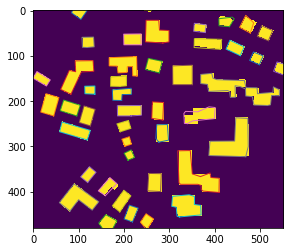

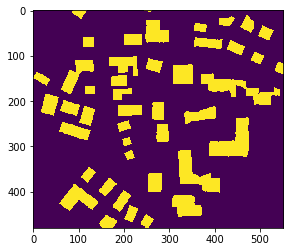

In [16]:
contours = detect_contours(np.int0(image_arr))
plot_contours(tar, contours, target)

plt.figure()
plt.imshow(image_arr)
plt.savefig('Prediction_' + target, dpi=600)